In [156]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

## ArcGIS

In [ ]:
from arcgis.gis import GIS

In [2]:
gis = GIS()

In [4]:
map1 = gis.map("Newcastle, UK")
map1

MapView(layout=Layout(height='400px', width='100%'))

## Folium

In [138]:
import folium

In [151]:
lat = tyne_la["lat"].mean()
lon = tyne_la["long"].mean()

folium.Map(location=[lat,lon], tiles="OpenStreetMap", zoom_start=11)

## API Requests

Office for National Statistics, Open Geography Portal
https://geoportal.statistics.gov.uk/datasets/local-athority-districts-december-2018-boundaries-gb-bfc?geometry=-2.455%2C54.815%2C-0.992%2C55.091

In [23]:
import requests
import json


ONS_QUERY = "https://ons-inspire.esriuk.com/arcgis/rest/services/Administrative_Boundaries/Local_Athority_Districts_December_2018_Boundaries_GB_BFC/MapServer/0/query?where=UPPER(lad18nm)%20like%20'%25NEWCASTLE%20UPON%20TYNE%25'&outFields=*&outSR=4326&f=json"

r = requests.get(ONS_QUERY)
r_json = json.loads(r.content)

r_json.keys()

dict_keys(['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features'])

In [21]:
r_json["features"][0].keys()

dict_keys(['attributes', 'geometry'])

In [22]:
r_json["features"][0]["attributes"]

{'objectid': 277,
 'lad18cd': 'E08000021',
 'lad18nm': 'Newcastle upon Tyne',
 'lad18nmw': ' ',
 'bng_e': 422287,
 'bng_n': 569662,
 'long': -1.65296996,
 'lat': 55.02099991,
 'st_area(shape)': 113456204.61295584,
 'st_length(shape)': 65248.297409148065}

In [27]:
r_json["features"][0]["geometry"]

{'rings': [[[-1.6378935693663756, 55.064768598603756],
   [-1.637959487424024, 55.064759810829244],
   [-1.6381479067302083, 55.06469479050682],
   [-1.638612065734178, 55.06461612365011],
   [-1.6388631878878674, 55.06455488047075],
   [-1.639023294003443, 55.06450864026354],
   [-1.639111349967659, 55.064463984030304],
   [-1.6393898527217607, 55.06431478285696],
   [-1.6395746504178264, 55.064134671909365],
   [-1.63960792308133, 55.06408086929782],
   [-1.6396334729144297, 55.06402434896661],
   [-1.639654370123615, 55.0639686236354],
   [-1.639667405755898, 55.06391116774652],
   [-1.639677352530093, 55.063852805033164],
   [-1.6396993585275064, 55.06367311088605],
   [-1.6396891831597544, 55.06358414437438],
   [-1.6396092583151802, 55.06341322337582],
   [-1.6394916967572675, 55.063250186026956],
   [-1.6393237046532307, 55.063125717631884],
   [-1.6391085893747999, 55.063030665612985],
   [-1.6384933813126117, 55.062840192424325],
   [-1.6380842061299183, 55.062721207195764],
 

In [24]:
gdf = gpd.read_file(ONS_QUERY)
gdf

,objectid,lad18cd,lad18nm,lad18nmw,bng_e,bng_n,long,lat,st_area(shape),st_length(shape),geometry
0,277,E08000021,Newcastle upon Tyne,,422287,569662,-1.65297,55.021,1.134562e+08,65248.297409,"POLYGON ((-1.63789 55.06477, -1.63796 55.06476..."


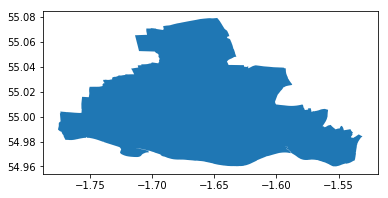

In [26]:
gdf.plot()

## Local Authorities: Downloaded dataset

https://geoportal.statistics.gov.uk/datasets/local-athority-districts-december-2018-boundaries-gb-bfc

In [16]:
la = gpd.read_file("/Users/jroberts/GitHub/newcastle-boundaries/Local_Athority_Districts_December_2018_Boundaries_GB_BFC/Local_Athority_Districts_December_2018_Boundaries_GB_BFC.shp")

In [21]:
la.head()

,objectid,lad18cd,lad18nm,lad18nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676201,9.355951e+07,71707.162397,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544701,5.388858e+07,43840.876046,"MULTIPOLYGON (((448958.901 521835.695, 449045...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567501,2.448203e+08,97993.352238,"MULTIPOLYGON (((455752.600 528195.705, 455738...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556900,2.049622e+08,119581.539702,"MULTIPOLYGON (((444157.002 527956.304, 444165...."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535301,1.974757e+08,107206.282970,"POLYGON ((436388.002 522354.197, 436392.298 52..."


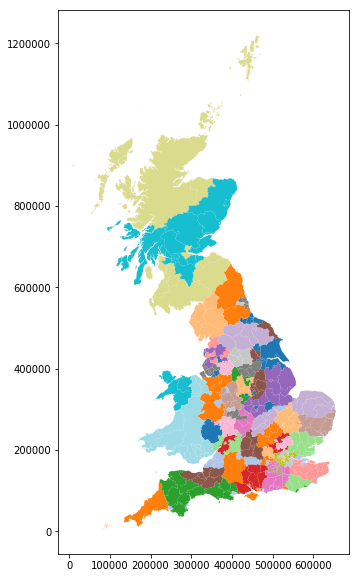

In [18]:
la.plot(cmap='tab20', figsize=(20,10))

## Output Areas: Downloaded dataset
https://geoportal.statistics.gov.uk/datasets/output-area-december-2011-full-clipped-boundaries-in-england-and-wales?geometry=-1.623%2C54.976%2C-1.600%2C54.980

In [19]:
oa = gpd.read_file("/Users/jroberts/GitHub/newcastle-boundaries/Output_Area_December_2011_Full_Clipped_Boundaries_in_England_and_Wales/Output_Area_December_2011_Full_Clipped_Boundaries_in_England_and_Wales.shp")

In [22]:
oa.head()

,objectid,oa11cd,lad11cd,st_areasha,st_lengths,geometry
0,1,E00000001,E09000001,6707.114639,448.117955,"POLYGON ((532303.125 181877.594, 532301.345 18..."
1,2,E00000003,E09000001,4186.859841,341.806167,"POLYGON ((532198.818 181863.087, 532192.305 18..."
2,3,E00000005,E09000001,8736.114423,444.386358,"POLYGON ((532178.979 181764.041, 532180.131 18..."
3,4,E00000007,E09000001,73494.467622,1607.081131,"POLYGON ((532201.292 181668.180, 532205.000 18..."
4,5,E00000010,E09000001,2533.057603,259.046872,"POLYGON ((532127.958 182133.192, 532106.413 18..."


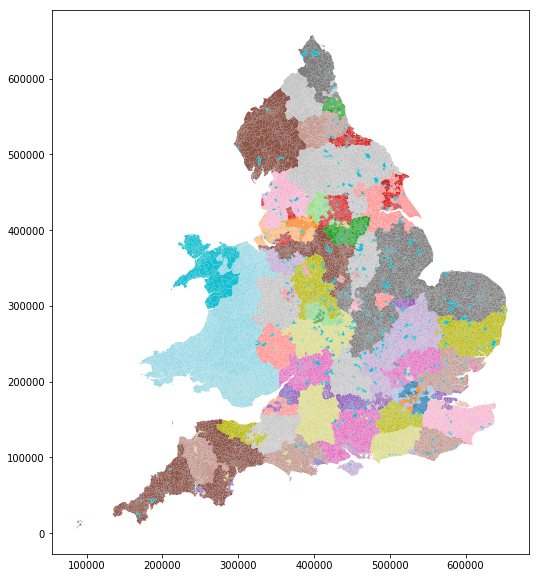

In [20]:
oa.plot(cmap='tab20', figsize=(20,10))

## Tyne and Wear Local Authorities

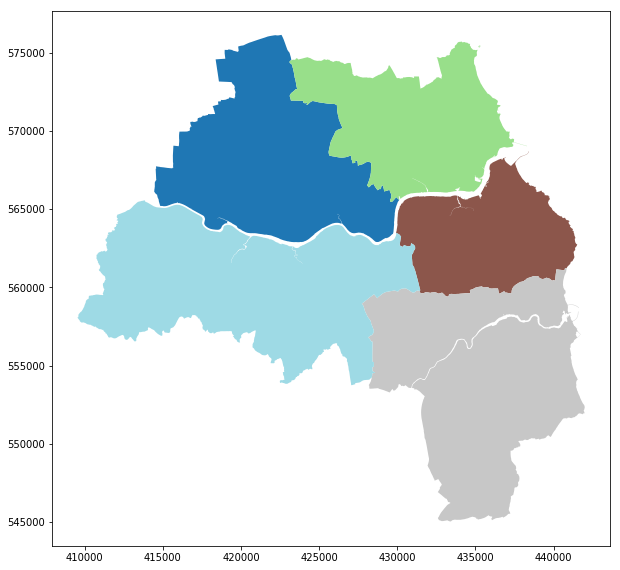

In [53]:
tyne_la = la[la["lad18nm"].isin(["Newcastle upon Tyne",
                                 "Gateshead",
                                 "North Tyneside",
                                 "South Tyneside",
                                 "Sunderland"])]

tyne_la.plot(figsize=(10,10), cmap="tab20")


## Output Areas intersecting Tyne & Wear

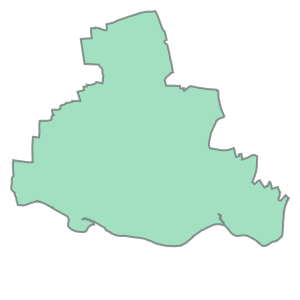

In [88]:
newc_upon_tyne_la = tyne_la[tyne_la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]
newc_upon_tyne_la.geometry

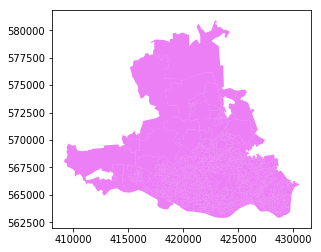

In [154]:
newc_upon_tyne_oa = oa[oa.intersects(newc_upon_tyne_la["geometry"])]
newc_upon_tyne_oa.plot(alpha=0.5)

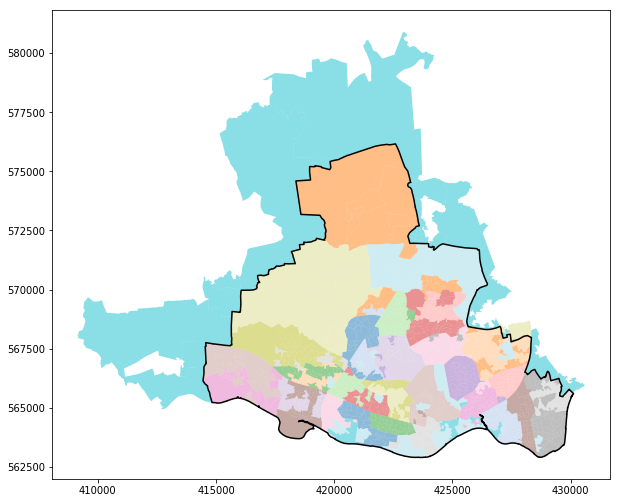

In [155]:
ax = plt.figure(figsize=(10,10)).gca()
x,y = newc_upon_tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'k')
newc_upon_tyne_oa.plot(alpha=0.5, ax=ax, cmap="tab20")

(404811.4810000005, 444328.21100000024, 540809.9684000008, 582817.0016000001)

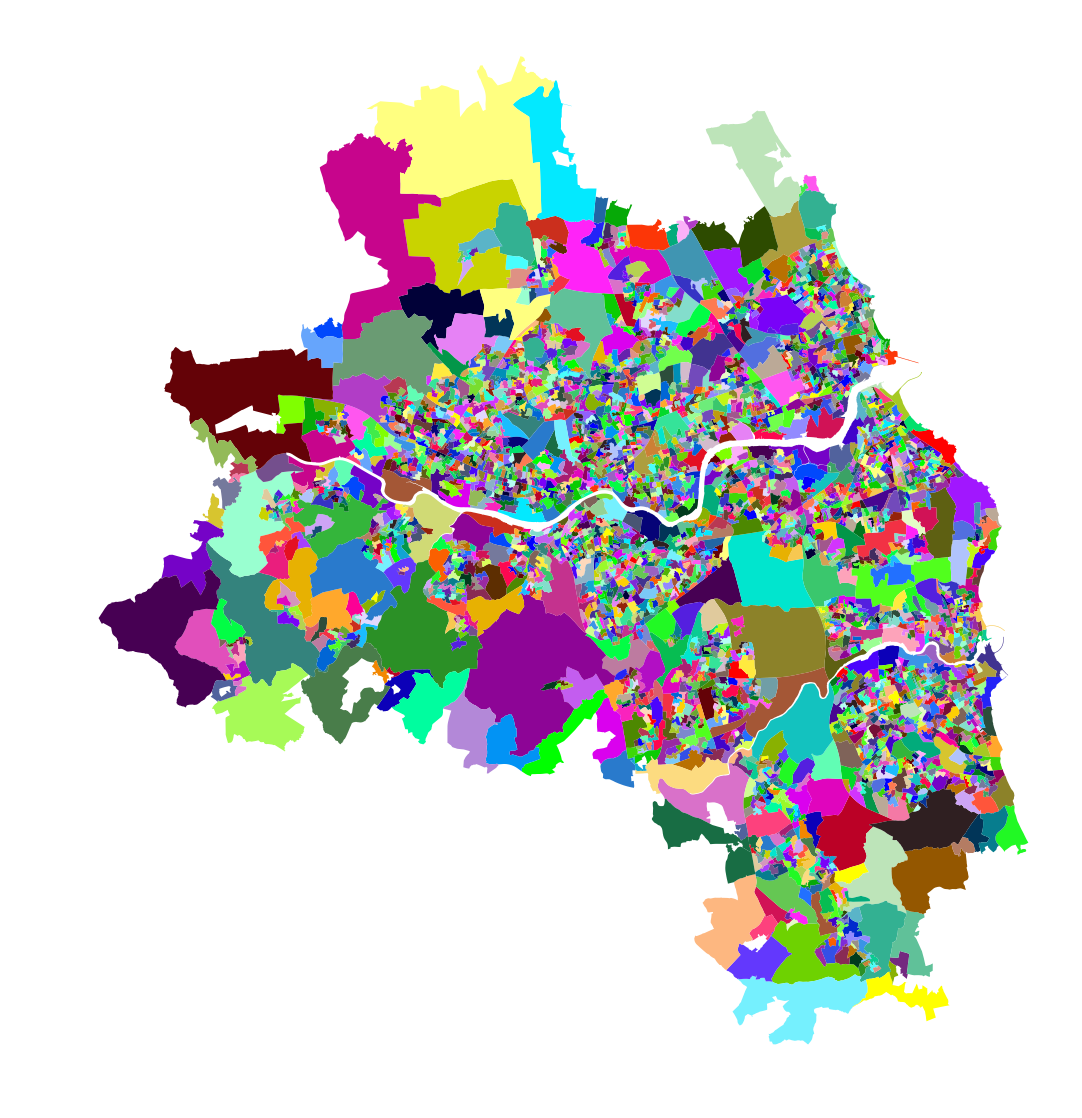

In [208]:
mask = None
for (i, df) in tyne_la.iterrows():
    try:
        mask = mask | oa.intersects(df["geometry"])
    except:
        mask = oa.intersects(df["geometry"])

from distinctipy import colorsets
tyne_oa = oa[mask]
tyne_oa.plot(figsize=(20,20), cmap=colorsets.get_colormap())
plt.axis('off')

## Population Centroids
https://geoportal.statistics.gov.uk/datasets/output-areas-december-2011-population-weighted-centroids?geometry=-1.806%2C54.947%2C-1.440%2C55.016

In [162]:
centroids = pd.read_csv("Output_Areas_December_2011_Population_Weighted_Centroids.csv")
centroids.head()

,X,Y,objectid,oa11cd
0,450159.431,531764.977,201,E00060262
1,448798.945,530276.749,202,E00060405
2,452841.465,533975.910,203,E00060484
3,450350.909,531759.635,204,E00060263
4,448725.664,529513.601,205,E00060402


## Population Estimates
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/censusoutputareaestimatesinthenortheastregionofengland

In [203]:
populations = pd.read_csv("Output_Areas_NorthEast_Population_Estimates_2018.csv")
populations["Population"] = populations["Population"].str.replace(",", "").astype(int)
populations.head()

,OA11CD,Population
0,E00041378,292
1,E00041381,268
2,E00041382,171
3,E00041383,350
4,E00041386,568


In [204]:
ne_pop_with_centroids = centroids.merge(populations, left_on='oa11cd', right_on='OA11CD')
ne_pop_with_centroids.drop("OA11CD", axis=1, inplace=True)
ne_pop_with_centroids.head()

,X,Y,objectid,oa11cd,Population
0,450159.431,531764.977,201,E00060262,181
1,448798.945,530276.749,202,E00060405,333
2,452841.465,533975.910,203,E00060484,316
3,450350.909,531759.635,204,E00060263,206
4,448725.664,529513.601,205,E00060402,290


In [209]:
tyne_oa = tyne_oa.merge(ne_pop_with_centroids[["X", "Y", "oa11cd", "Population"]],
                        how="left", on="oa11cd")
tyne_oa.head()

,objectid,oa11cd,lad11cd,st_areasha,st_lengths,geometry,X,Y,Population
0,40088,E00041363,E08000020,38497.106780,1265.069761,"POLYGON ((425993.545 562313.950, 425999.000 56...",425983.378,562148.554,214
1,40089,E00041364,E08000020,32401.868541,935.899807,"POLYGON ((425551.232 562290.629, 425551.176 56...",425443.912,562250.409,545
2,40090,E00041366,E08000020,14892.379254,665.740136,"POLYGON ((426568.429 562372.571, 426568.191 56...",426561.905,562275.307,224
3,40091,E00041367,E08000020,86037.950651,1705.939339,"POLYGON ((426311.000 562385.221, 426311.000 56...",426183.089,562133.054,222
4,40092,E00041368,E08000020,51489.982018,2031.127079,"POLYGON ((426739.477 562098.665, 426752.484 56...",426497.293,561986.765,284


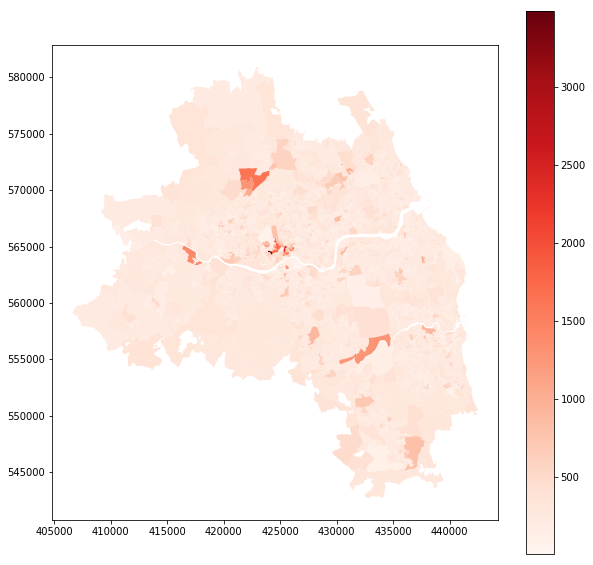

In [212]:
tyne_oa.plot(column="Population",
             cmap="Reds",
             figsize=(10,10),
             legend=True)

In [213]:
len(tyne_oa)

3852

## Quick & Dirty Optimisation

In [215]:
import numpy as np

In [243]:
n_sensors = 10

min_x = tyne_oa["X"].min()
max_x = tyne_oa["X"].max()
min_y = tyne_oa["Y"].min()
max_y = tyne_oa["Y"].max()

sensor_x = np.random.randint(min_x, max_x, n_sensors)
sensor_y = np.random.randint(min_y, max_y, n_sensors)

sensors = np.array([sensor_x, sensor_y]).transpose()

In [224]:
sensor_x = np.random.randint(min_x, max_x, n_sensors)
sensor_y = np.random.randint(min_y, max_y, n_sensors)

array([554384, 559584, 556804, 554226, 572716, 560582, 557946, 549703,
       574015, 568183])

In [219]:
min_x

408007.1600000001

In [220]:
max_x

442257.7620000001